In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

<AxesSubplot:xlabel='reconstruction_loss_weight', ylabel='test-pr-auc'>

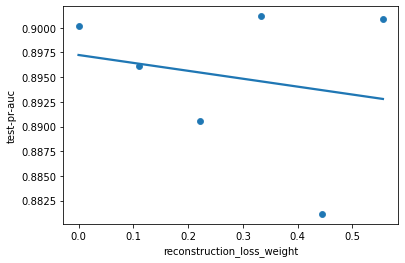

In [13]:
import pandas as pd
# with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/ptb-0_channels_off-no_additional_noise-impute_only_missing-reconstruction_loss/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/ptb-1_channels_off-no_additional_noise-impute_only_missing-reconstruction_loss/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    b = pickle.load(handle)

results = pd.DataFrame(b)
sns.scatterplot(data=results, x='reconstruction_loss_weight', y='test-pr-auc')
sns.regplot(data=results, x='reconstruction_loss_weight', y='test-pr-auc',ci=None)
